In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt
import geopandas as gpd
from sodapy import Socrata

## Carga de Datos

In [ ]:
# Codigo para conectarse a la API y descargar la informacióm

# client = Socrata("www.datos.gov.co", None) 

# where_query = """ 
# fechaobservacion >= '2015-01-01T00:00:00' 
# AND fechaobservacion <= '2023-12-31T23:59:59' 
# AND departamento IN ('NARIÑO', 'CUNDINAMARCA') 
# AND descripcionsensor IN ('Temp Aire 2 m') 
# """ 

# chunk = 500000 
# offset = 0 
# all_rows = [] 

# while True: 

#     data = client.get( 
#         "sbwg-7ju4", 
#         where=where_query, 
#         limit=chunk, 
#         offset=offset 
#     ) 
   
#     if not data: 
#         break 
#     all_rows.extend(data) 
#     offset += chunk 
#     print(f"Descargadas → {len(all_rows):,} filas")  

# df_temperatura = pd.DataFrame.from_records(all_rows) 

# # Parsear la fecha sin cambiar el nombre de la columna 
# df_temperatura["fechaobservacion"] = pd.to_datetime(df_temperatura["fechaobservacion"], errors="coerce") 

In [ ]:
# Se guardan los datos en un csv

# df_temperatura.to_csv('temperatura_narino_cundinamarca.csv')

In [ ]:
# Se cargan los datos que se guardaron como csv
df_temperatura = pd.read_csv('temperatura_narino_cundinamarca.csv')

In [ ]:
# Se muestran las primeras 5 líneas del DataFrame
df_temperatura.head(5)

,Unnamed: 0,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0,21195502,68,2019-07-01 03:00:00,13.300,AGUAS CLARAS - CAR,CUNDINAMARCA,SAN BERNARDO,ALTO MAGDALENA,4.145,-74.428,Temp Aire 2 m,°C
1,1,21205521,68,2020-01-21 02:20:00,9.047,SANTA HELENA - AUT,CUNDINAMARCA,LA CALERA,ALTO MAGDALENA,4.738,-73.936,Temp Aire 2 m,°C
2,2,21205514,68,2019-07-01 18:30:00,12.165,LAS MARGARITAS - AUT,CUNDINAMARCA,EL ROSAL,ALTO MAGDALENA,4.469,-74.079,Temp Aire 2 m,°C
3,3,35075090,68,2019-07-01 04:30:00,10.624,MACHETA - CHIVOR,CUNDINAMARCA,MACHETÁ,META,5.083,-73.650,Temp Aire 2 m,°C
4,4,21205515,68,2020-01-21 21:40:00,9.103,MERENGO - AUT,CUNDINAMARCA,SOACHA,ALTO MAGDALENA,4.700,-74.174,Temp Aire 2 m,°C


In [11]:
# Se elimina la primer columna
df_temperatura = df_temperatura.drop(columns=['Unnamed: 0'])

## Exploración de los datos

In [ ]:
# Se revisan los tipos de datos que hay en cada columna
df_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8120498 entries, 0 to 8120497
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   codigoestacion     int64  
 2   codigosensor       int64  
 3   fechaobservacion   object 
 4   valorobservado     float64
 5   nombreestacion     object 
 6   departamento       object 
 7   municipio          object 
 8   zonahidrografica   object 
 9   latitud            float64
 10  longitud           float64
 11  descripcionsensor  object 
 12  unidadmedida       object 
dtypes: float64(3), int64(3), object(7)
memory usage: 805.4+ MB


Al guardar la info como csv la fecha queda como tipo object y se hace necesario hacer el cambio de formato

In [ ]:
# Se realiza el cambio a formateo datetime de la columna fechaobservacion

df_temperatura["fechaobservacion"] = pd.to_datetime(df_temperatura["fechaobservacion"], errors="coerce") 

In [ ]:
# Se revisan los faltantes en las columnas de la base

for column in df_temperatura.columns:
    faltantes = df_temperatura[column].isna().sum()
    print(f'Columna {column} tiene {faltantes} datos faltantes')


Columna Unnamed: 0 tiene 0 datos faltantes
Columna codigoestacion tiene 0 datos faltantes
Columna codigosensor tiene 0 datos faltantes
Columna fechaobservacion tiene 0 datos faltantes
Columna valorobservado tiene 0 datos faltantes
Columna nombreestacion tiene 0 datos faltantes
Columna departamento tiene 0 datos faltantes
Columna municipio tiene 0 datos faltantes
Columna zonahidrografica tiene 0 datos faltantes
Columna latitud tiene 0 datos faltantes
Columna longitud tiene 0 datos faltantes
Columna descripcionsensor tiene 0 datos faltantes
Columna unidadmedida tiene 0 datos faltantes


No hay datos faltantes en la base

In [13]:
# Se divide la base por departamentos

temperatura_narino = df_temperatura[df_temperatura['departamento']=='NARIÑO']
temperatura_cundinamarca = df_temperatura[df_temperatura['departamento']=='CUNDINAMARCA']

### Estadísticos

#### Cundinamarca

<Axes: >

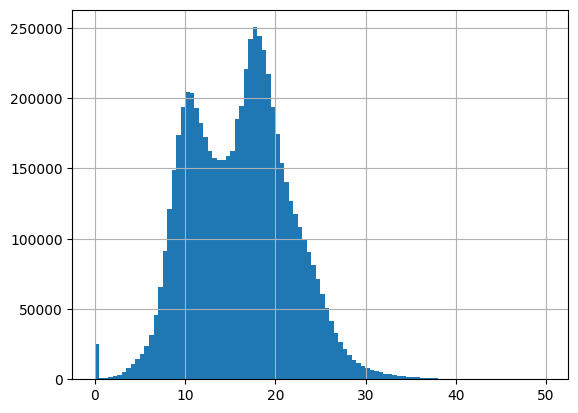

In [41]:
temperatura_cundinamarca.valorobservado.hist(bins=100)

In [65]:
df_desc_cund = temperatura_cundinamarca.valorobservado.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.90,0.95,0.99]).to_frame()
df_desc_cund.map(lambda x: f"{x:.2f}")

,valorobservado
count,6376435.00
mean,16.01
std,5.55
min,0.00
1%,4.70
5%,7.82
25%,11.50
50%,16.28
75%,19.73
90%,23.18


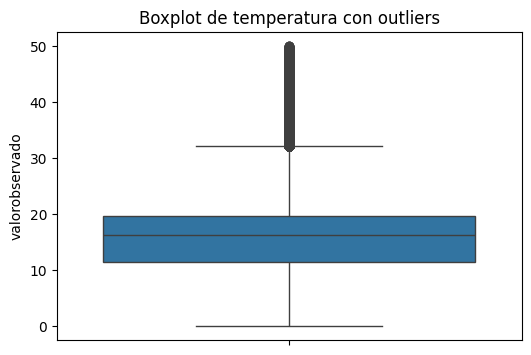

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(y=temperatura_cundinamarca['valorobservado'], showfliers=True)  # showfliers=True muestra outliers

plt.title("Boxplot de temperatura con outliers")
plt.show()

In [68]:
q1_cund = temperatura_cundinamarca.valorobservado.quantile(0.25)
q3_cund = temperatura_cundinamarca.valorobservado.quantile(0.75)
intqrt_cund = q3_cund - q1_cund
outlier_low_cund = q1_cund - 3*intqrt_cund
outlier_up_cund = q3_cund + 3*intqrt_cund

print(f'''Outliers
      Banda inferior: {outlier_low_cund}
      Banda superior: {outlier_up_cund}''')

Outliers
      Banda inferior: -13.177999999999997
      Banda superior: 44.403999999999996


In [70]:
from scipy import stats

median_cund = temperatura_cundinamarca.valorobservado.median()
mad_cund = stats.median_abs_deviation(temperatura_cundinamarca.valorobservado)

modified_z_cund = 0.6745 * (temperatura_cundinamarca.valorobservado - median_cund) / mad_cund

outliers_mz_cund = temperatura_cundinamarca[abs(modified_z_cund) > 3.5]

In [71]:
outliers_mz_cund.valorobservado.describe()

count    2808.000000
mean       40.896913
std         3.243821
min        37.646000
25%        38.400000
50%        39.600000
75%        42.592500
max        49.961000
Name: valorobservado, dtype: float64

In [72]:
outliers_mz_cund.municipio.value_counts()

municipio
SOPÓ                1573
GIRARDOT             598
PUERTO SALGAR        311
TIBACUY              288
MOSQUERA              11
CABRERA               10
GUASCA                 6
UBATÉ                  5
CARMEN DE CARUPA       4
VILLAGÓMEZ             1
VILLETA                1
Name: count, dtype: int64

In [73]:
for municipio in outliers_mz_cund.municipio.unique():
    print(f'{municipio}')
    df = outliers_mz_cund.loc[outliers_mz_cund['municipio']==municipio].copy() 
    df['fecha'] = df['fechaobservacion'].dt.date
    df['mes'] = df['fechaobservacion'].dt.strftime('%m-%Y')
    print(f'''fecha minima: {df.fechaobservacion.min()}
fecha maxima: {df.fechaobservacion.max()}
fechas diferentes: {len(df.fecha.unique())}
meses diferentes: {df.mes.unique()}
''')

SOPÓ
fecha minima: 2018-10-29 15:00:00
fecha maxima: 2021-09-07 10:00:00
fechas diferentes: 37
meses diferentes: ['10-2018' '11-2018' '12-2018' '02-2019' '01-2019' '11-2019' '08-2021'
 '09-2021']

GIRARDOT
fecha minima: 2015-01-03 15:00:00
fecha maxima: 2023-09-07 16:00:00
fechas diferentes: 184
meses diferentes: ['09-2018' '06-2019' '01-2019' '12-2015' '08-2015' '02-2017' '02-2015'
 '09-2015' '03-2018' '10-2015' '09-2017' '04-2018' '02-2019' '08-2018'
 '07-2015' '03-2015' '07-2018' '01-2015' '08-2017' '10-2017' '08-2019'
 '05-2018' '02-2018' '07-2019' '05-2015' '09-2019' '10-2019' '01-2020'
 '02-2020' '03-2020' '08-2023' '09-2023']

PUERTO SALGAR
fecha minima: 2015-01-07 16:00:00
fecha maxima: 2020-02-19 17:00:00
fechas diferentes: 91
meses diferentes: ['09-2015' '07-2015' '12-2015' '08-2015' '02-2016' '03-2018' '05-2016'
 '08-2017' '08-2018' '04-2015' '07-2018' '08-2016' '01-2015' '08-2019'
 '09-2017' '03-2016' '10-2015' '06-2016' '07-2017' '09-2019' '01-2020'
 '02-2020']

GUASCA
fec

#### Nariño

<Axes: >

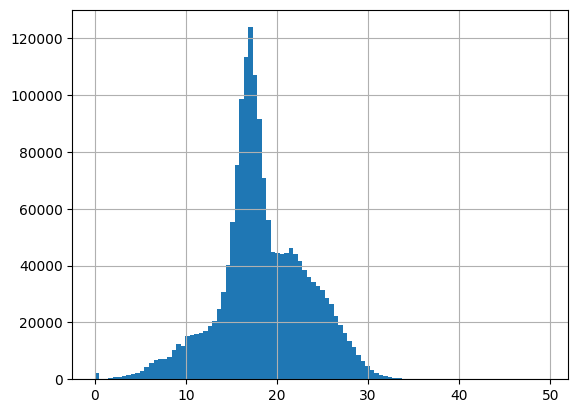

In [62]:
temperatura_narino.valorobservado.hist(bins=100)

In [66]:
df_desc_narino = temperatura_narino.valorobservado.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.90,0.95,0.99]).to_frame()
df_desc_narino.map(lambda x: f"{x:.2f}")

,valorobservado
count,1744063.00
mean,18.42
std,4.91
min,0.00
1%,5.90
5%,9.90
25%,15.86
50%,17.80
75%,21.66
90%,25.12


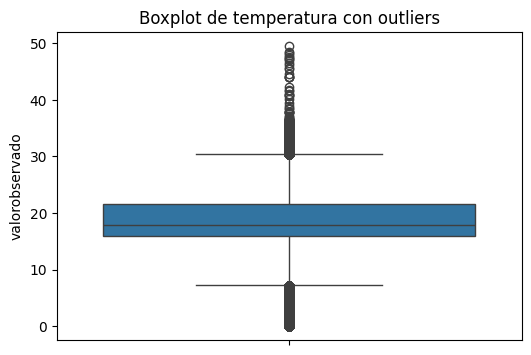

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(y=temperatura_narino['valorobservado'], showfliers=True)  # showfliers=True muestra outliers

plt.title("Boxplot de temperatura con outliers")
plt.show()

In [69]:
q1_nar = temperatura_narino.valorobservado.quantile(0.25)
q3_nar = temperatura_narino.valorobservado.quantile(0.75)
intqrt_nar = q3_nar - q1_nar
outlier_low_nar = q1_nar - 3*intqrt_nar
outlier_up_nar = q3_nar + 3*intqrt_nar

print(f'''Outliers
      Banda inferior: {outlier_low_nar}
      Banda superior: {outlier_up_nar}''')

Outliers
      Banda inferior: -1.5444799999999965
      Banda superior: 39.067699999999995


In [77]:
from scipy import stats

median_nar = temperatura_narino.valorobservado.median()
mad_nar = stats.median_abs_deviation(temperatura_narino.valorobservado)

modified_z_nar = 0.6745 * (temperatura_narino.valorobservado - median_nar) / mad_nar

outliers_mz_nar = temperatura_narino[abs(modified_z_nar) > 3.5]

In [78]:
outliers_mz_nar.valorobservado.describe()

count    8731.000000
mean       11.123151
std        14.390575
min         0.000000
25%         0.800000
50%         2.900000
75%        32.011150
max        49.500000
Name: valorobservado, dtype: float64

In [79]:
outliers_mz_nar.municipio.value_counts()

municipio
CUMBAL       2749
PUERRES      1553
TAMINANGO    1550
TÚQUERRES     966
ALDANA        567
LA UNIÓN      374
SANDONÁ       367
PASTO         264
CONSACÁ       263
BARBACOAS      72
TUMACO          4
CONTADERO       1
TANGUA          1
Name: count, dtype: int64

In [80]:
for municipio in outliers_mz_nar.municipio.unique():
    print(f'{municipio}')
    df = outliers_mz_nar.loc[outliers_mz_nar['municipio']==municipio].copy() 
    df['fecha'] = df['fechaobservacion'].dt.date
    df['mes'] = df['fechaobservacion'].dt.strftime('%m-%Y')
    print(f'''fecha minima: {df.fechaobservacion.min()}
fecha maxima: {df.fechaobservacion.max()}
fechas diferentes: {len(df.fecha.unique())}
meses diferentes: {df.mes.unique()}
''')

CUMBAL
fecha minima: 2019-07-24 18:00:00
fecha maxima: 2020-05-03 06:00:00
fechas diferentes: 207
meses diferentes: ['01-2020' '08-2019' '07-2019' '09-2019' '10-2019' '11-2019' '12-2019'
 '02-2020' '03-2020' '04-2020' '05-2020']

TÚQUERRES
fecha minima: 2015-01-01 00:00:00
fecha maxima: 2019-07-03 09:00:00
fechas diferentes: 87
meses diferentes: ['01-2015' '02-2019' '02-2015' '03-2018' '11-2016' '12-2018' '05-2016'
 '02-2016' '07-2019' '09-2015' '06-2018' '01-2017' '10-2018' '05-2018'
 '08-2018' '01-2019' '05-2019' '09-2018' '07-2018' '12-2017' '04-2016'
 '11-2018' '01-2018']

CONSACÁ
fecha minima: 2016-08-05 12:45:00
fecha maxima: 2023-08-17 13:30:00
fechas diferentes: 42
meses diferentes: ['08-2017' '09-2017' '08-2016' '09-2016' '07-2017' '03-2018' '01-2019'
 '02-2019' '09-2019' '01-2020' '02-2020' '03-2020' '06-2020' '07-2020'
 '09-2021' '06-2023' '08-2023']

TAMINANGO
fecha minima: 2015-01-01 13:00:00
fecha maxima: 2023-03-02 13:00:00
fechas diferentes: 626
meses diferentes: ['08-2

## Organización de los datos

Se van a agrupar los datos de manera mensual ya que es la granularidad definida por el equipo de trabajo y de esta manera se pueden unir al resto de varaibles que se van a utilizar en el modelo

In [95]:
# Se crea la variable mes para poder agrupar

df_temperatura['mes'] = df_temperatura['fechaobservacion'].dt.strftime('%Y-%m')

In [96]:
# Se hace la agrupación por mes
temperatura_mensual = df_temperatura.groupby(['mes','departamento', 'municipio'])\
.agg(
    temperatura_promedio = ('valorobservado','mean'),
    temperatura_minima = ('valorobservado','min'),
    temperatura_maxima = ('valorobservado','max')
).reset_index()

In [97]:
df_temperatura.fechaobservacion.max()

Timestamp('2023-09-10 23:00:00')

In [98]:
temperatura_mensual

,mes,departamento,municipio,temperatura_promedio,temperatura_minima,temperatura_maxima
0,2015-01,CUNDINAMARCA,CABRERA,10.827816,4.3,17.7
1,2015-01,CUNDINAMARCA,GIRARDOT,29.057392,20.6,38.7
2,2015-01,CUNDINAMARCA,GUASCA,4.592105,0.0,46.4
3,2015-01,CUNDINAMARCA,LA CALERA,8.551748,2.2,17.1
4,2015-01,CUNDINAMARCA,LENGUAZAQUE,10.331755,0.0,20.0
...,...,...,...,...,...,...
3968,2023-09,CUNDINAMARCA,PACHO,18.733040,13.3,25.9
3969,2023-09,NARIÑO,ALDANA,10.398643,1.4,19.8
3970,2023-09,NARIÑO,IMUÉS,14.531008,9.0,21.7
3971,2023-09,NARIÑO,PASTO,10.697917,2.7,16.9


In [99]:
temperatura_mensual.to_csv('temperatura_mensual.csv')